In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download deepfake-detection-challenge

100% 4.12G/4.13G [00:24<00:00, 143MB/s]
100% 4.13G/4.13G [00:25<00:00, 177MB/s]


# Deepfake Detection

# 1. Imports

In [6]:
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib

# 2. Review of Data Files

In [7]:
! unzip deepfake-detection-challenge.zip

Archive:  deepfake-detection-challenge.zip
  inflating: sample_submission.csv   
  inflating: test_videos/aassnaulhq.mp4  
  inflating: test_videos/aayfryxljh.mp4  
  inflating: test_videos/acazlolrpz.mp4  
  inflating: test_videos/adohdulfwb.mp4  
  inflating: test_videos/ahjnxtiamx.mp4  
  inflating: test_videos/ajiyrjfyzp.mp4  
  inflating: test_videos/aktnlyqpah.mp4  
  inflating: test_videos/alrtntfxtd.mp4  
  inflating: test_videos/aomqqjipcp.mp4  
  inflating: test_videos/apedduehoy.mp4  
  inflating: test_videos/apvzjkvnwn.mp4  
  inflating: test_videos/aqrsylrzgi.mp4  
  inflating: test_videos/axfhbpkdlc.mp4  
  inflating: test_videos/ayipraspbn.mp4  
  inflating: test_videos/bcbqxhziqz.mp4  
  inflating: test_videos/bcvheslzrq.mp4  
  inflating: test_videos/bdshuoldwx.mp4  
  inflating: test_videos/bfdopzvxbi.mp4  
  inflating: test_videos/bfjsthfhbd.mp4  
  inflating: test_videos/bjyaxvggle.mp4  
  inflating: test_videos/bkcyglmfci.mp4  
  inflating: test_videos/bktkwbcawi.m

In [8]:
train_sample_metadata = pd.read_json('/content/train_sample_videos/metadata.json').T
train_sample_metadata.head()

,label,split,original
aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
abarnvbtwb.mp4,REAL,train,None
abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


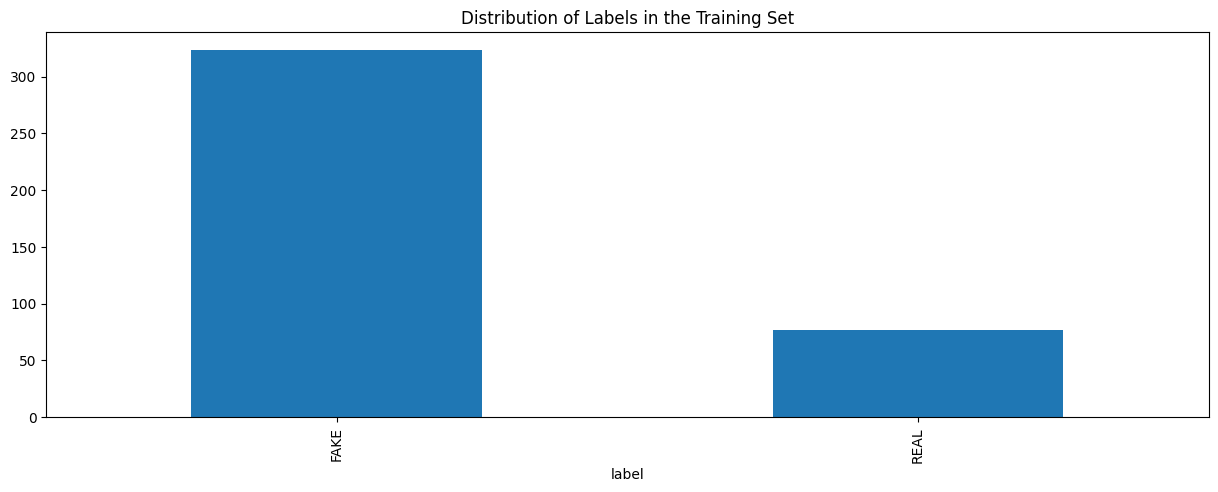

In [9]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

# 3. Recognizing people in a video stream

## From video to frames
In **cv2.VideoCapture(VIDEO_STREAM)**, we just have to mention the video name with it’s extension. 

You can set frame rate which is widely known as fps (frames per second). Here I set 0.5 so it will capture a frame at every 0.5 seconds, means 2 frames (images) for each second.

It will save images with name as **image1.jpg**, **image2.jpg** and so on.

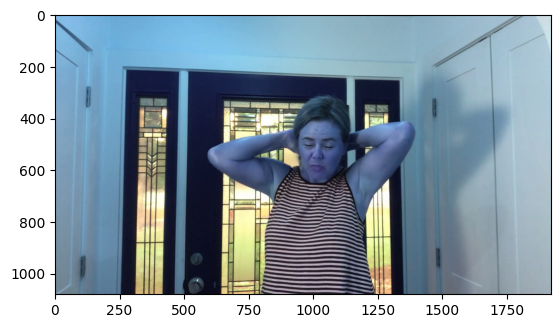

In [ ]:
import cv2

VIDEO_STREAM = "/content/test_videos/ytddugrwph.mp4"
#VIDEO_STREAM_OUT = "/kaggle/input/deepfake-detection-challenge/test_videos/Result.mp4"

vidcap = cv2.VideoCapture(VIDEO_STREAM)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite("image"+str(count)+".jpg", image) # save frame as JPG file
        plt.imshow(image)
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

# 4. Face Detection

Source: https://www.kaggle.com/robikscube/kaggle-deepfake-detection-introduction


## Locating a face within an image

In [12]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=3813bdf0036c600bfe413360516cf4eadbb7d38dbb5aafba09bea30726247113
  Stored in directory: /root/.cache/pip/wheels/22/a8/60/4a2aeb763d63f50190f4c4e07069a22245347eeafdb3a67551
Successfully built face-recognition-models


I found 1 face(s) in this photograph.
A face is located at pixel location Top: 706, Left: 290, Bottom: 974, Right: 557


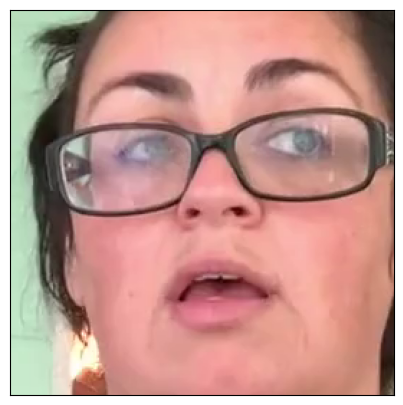

In [ ]:
import face_recognition
import cv2 as cv
import os
import matplotlib.pylab as plt
from PIL import Image
train_dir = '/content/train_sample_videos'
train_video_files = [train_dir + x for x in os.listdir(train_dir)]
# video_file = train_video_files[30]
video_file = '/content/train_sample_videos/afoovlsmtx.mp4'
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release() 
face_locations = face_recognition.face_locations(image)

# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    # Access the actual face itself:
    face_image = image[top:bottom, left:right]
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

# 5. Display test examples and labels

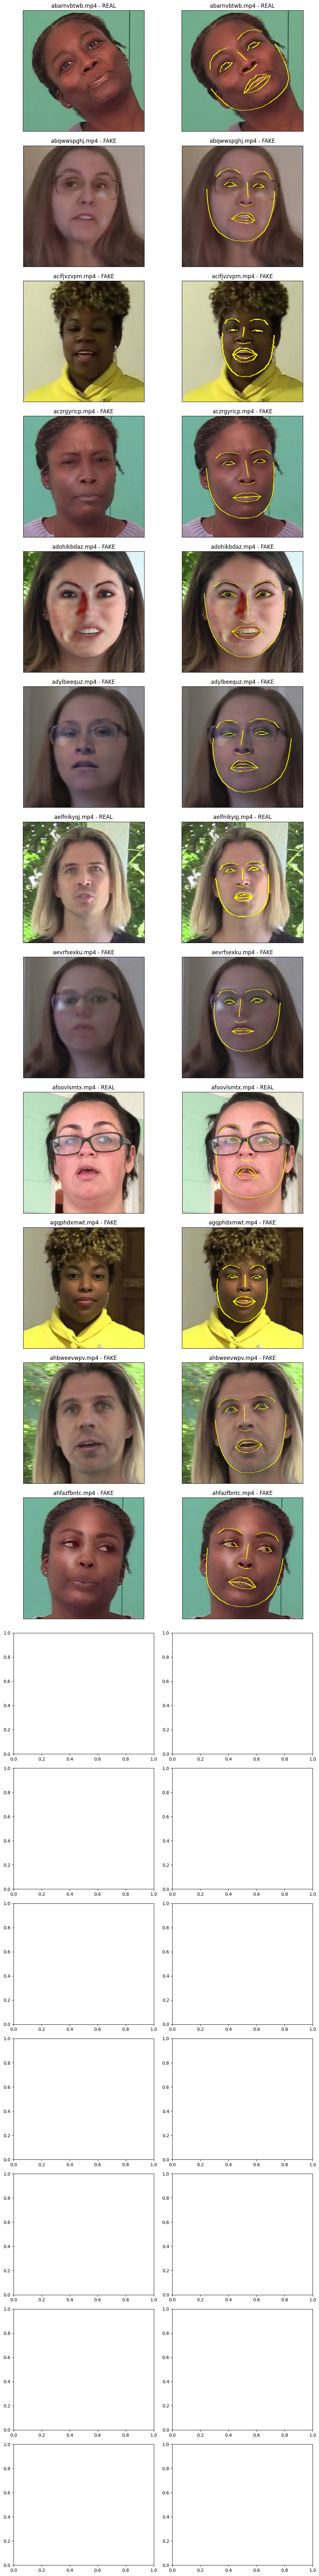

In [ ]:
from PIL import Image, ImageDraw

fig, axs = plt.subplots(19, 2, figsize=(10, 80))
axs = np.array(axs)
axs = axs.reshape(-1)
i = 0
pad = 60 #pad is addded to the plot to zoom out of the face
for fn in train_sample_metadata.index[:24]:
    label = train_sample_metadata.loc[fn]['label']
    orig = train_sample_metadata.loc[fn]['label']
    video_file = f'/content/train_sample_videos/{fn}'
    ax = axs[i]
    cap = cv.VideoCapture(video_file)
    success, image = cap.read()
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        # Print first face
        face_location = face_locations[0]
        top, right, bottom, left = face_location
        face_image = image[top-pad:bottom+pad, left-pad:right+pad]
        ax.imshow(face_image)
        ax.grid(False)
        ax.title.set_text(f'{fn} - {label}')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        # Find landmarks
        face_landmarks_list = face_recognition.face_landmarks(face_image)
        if len(face_landmarks_list) > 0:
            face_landmarks = face_landmarks_list[0]
            pil_image = Image.fromarray(face_image)
            d = ImageDraw.Draw(pil_image)
            for facial_feature in face_landmarks.keys():
                d.line(face_landmarks[facial_feature], width=2, fill='yellow')
            landmark_face_array = np.array(pil_image)
            ax2 = axs[i+1]
            ax2.imshow(landmark_face_array)
            ax2.grid(False)
            ax2.title.set_text(f'{fn} - {label}')
            ax2.xaxis.set_visible(False)
            ax2.yaxis.set_visible(False)
            i += 2
plt.grid(False)
plt.tight_layout()
plt.show()

### Install dependencies

In [10]:
%%capture
# Install facenet-pytorch
%pip install /kaggle/input/facenet-pytorch-vggface2/facenet_pytorch-1.0.1-py3-none-any.whl

# Copy model checkpoints to torch cache so they are loaded automatically by the package
! mkdir -p /tmp/.cache/torch/checkpoints/
! cp /kaggle/input/facenet-pytorch-vggface2/20180402-114759-vggface2-logits.pth /tmp/.cache/torch/checkpoints/vggface2_DG3kwML46X.pt
! cp /kaggle/input/facenet-pytorch-vggface2/20180402-114759-vggface2-features.pth /tmp/.cache/torch/checkpoints/vggface2_G5aNV2VSMn.pt

### Imports

In [11]:
! pip install facenet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.5 MB/s eta 0:00:00


In [8]:
import os
import glob
import torch
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# See github.com/timesler/facenet-pytorch:
from facenet_pytorch import MTCNN, InceptionResnetV1

device = 'cuda:0' if torch.cuda.is_available() else 'cpu' #checks if GPY is being used or the CPU
print(f'Running on device: {device}')
torch.cuda.get_device_name(0)

ModuleNotFoundError: ignored

## Create MTCNN and Inception Resnet models

In [ ]:
# Load face detector
mtcnn = MTCNN(device=device).eval()

# Load facial recognition model
resnet = InceptionResnetV1(pretrained='vggface2', num_classes=2, device=device).eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

# 7. Process test videos

In [ ]:
# Get all test videos
filenames = glob.glob('/content/train_sample_videos/*.mp4')

# Number of frames to sample (evenly spaced) from each video
n_frames = 10

X = []
with torch.no_grad():
    for i, filename in enumerate(filenames):
        print(f'Processing {i+1:5n} of {len(filenames):5n} videos\r', end='')
        
        try:
            # Create video reader and find length
            v_cap = cv2.VideoCapture(filename)
            v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
            
            # Pick 'n_frames' evenly spaced frames to sample
            sample = np.linspace(0, v_len - 1, n_frames).round().astype(int)
            imgs = []
            for j in range(v_len):
                success, vframe = v_cap.read()
                vframe = cv2.cvtColor(vframe, cv2.COLOR_BGR2RGB)
                if j in sample:
                    imgs.append(Image.fromarray(vframe))
            v_cap.release()
            
            # Pass image batch to MTCNN as a list of PIL images
            faces = mtcnn(imgs)
            
            # Filter out frames without faces
            faces = [f for f in faces if f is not None]
            faces = torch.stack(faces).to(device)
            
            # Generate facial feature vectors using a pretrained model
            embeddings = resnet(faces)
            
            # Calculate centroid for video and distance of each face's feature vector from centroid
            centroid = embeddings.mean(dim=0)
            X.append((embeddings - centroid).norm(dim=1).cpu().numpy())
        except KeyboardInterrupt:
            raise Exception("Stopped.")
        except:
            X.append(None)

/usr/local/lib/python3.9/dist-packages/facenet_pytorch/models/mtcnn.py:444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_boxes = np.array(selected_boxes)
/usr/local/lib/python3.9/dist-packages/facenet_pytorch/models/mtcnn.py:446: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selected_points = np.array(selected_points)


# 8. Predict classes

In [ ]:
bias = -0.4
weight = 0.068235746

facial_features_map = []
for filename, x_i in zip(filenames, X):
    if x_i is not None and len(x_i) == 10:
        prob = 1 / (1 + np.exp(-(bias + (weight * x_i).sum())))
    else:
        prob = 0.6
    facial_features_map.append([os.path.basename(filename), prob])

# 9. Output

In [ ]:
submission = pd.DataFrame(facial_features_map, columns=['', 'result'])
submission.sort_values('').to_csv('facial_features_map.csv', index=False)

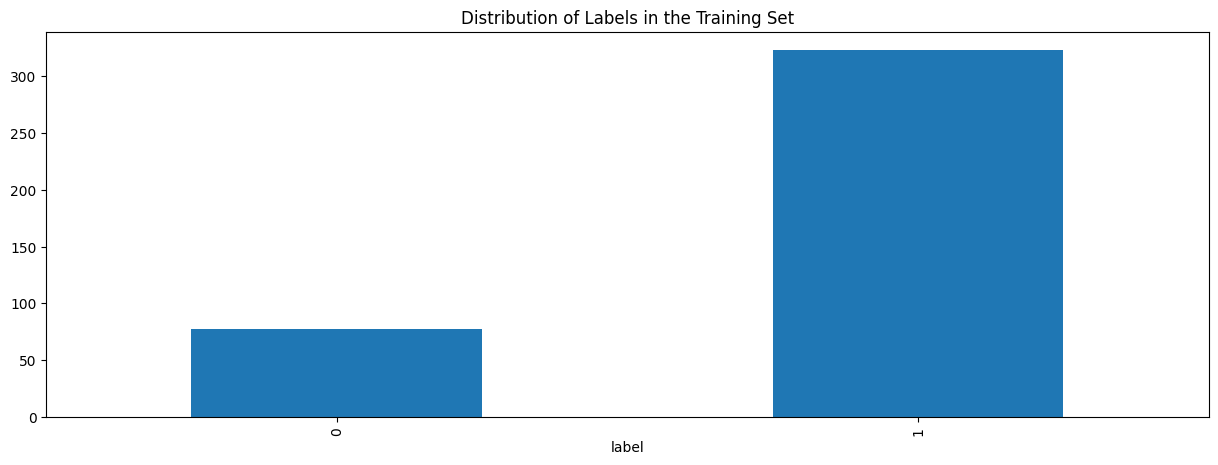

In [ ]:
train_sample_metadata.groupby('label')['label'].count().plot(figsize=(15, 5), kind='bar', title='Distribution of Labels in the Training Set')
plt.show()

In [ ]:
train_df = pd.DataFrame(train_sample_metadata)

In [ ]:
train_df['label'].replace(['REAL', 'FAKE'],[0, 1], inplace=True)
train_df.rename(columns={'':'filename'})
train_df.head()

,label,split,original
aagfhgtpmv.mp4,1,train,vudstovrck.mp4
aapnvogymq.mp4,1,train,jdubbvfswz.mp4
abarnvbtwb.mp4,0,train,None
abofeumbvv.mp4,1,train,atvmxvwyns.mp4
abqwwspghj.mp4,1,train,qzimuostzz.mp4


In [ ]:
submission = submission.set_index('')
submission.head()

,result
,
bydaidkpdp.mp4,0.444157
chviwxsfhg.mp4,0.511081
chtapglbcj.mp4,0.461449
akxoopqjqz.mp4,0.473561
atyntldecu.mp4,0.464007


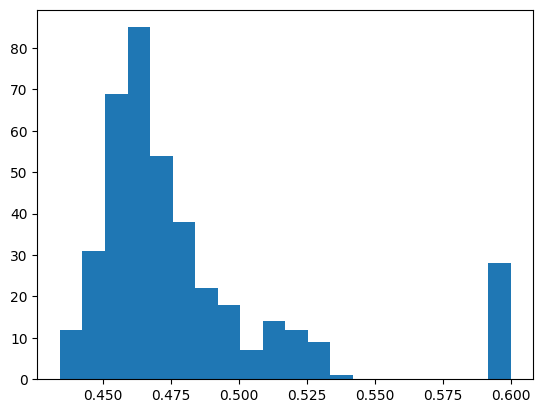

,filename,label
0,bydaidkpdp.mp4,0.444157
1,chviwxsfhg.mp4,0.511081
2,chtapglbcj.mp4,0.461449
3,akxoopqjqz.mp4,0.473561
4,atyntldecu.mp4,0.464007
...,...,...
395,bqdjzqhcft.mp4,0.450591
396,akvmwkdyuv.mp4,0.475684
397,ddqccgmtka.mp4,0.499283
398,ctpqeykqdp.mp4,0.456271


In [ ]:
plt.hist(submission.label, 20)
plt.show()
submission

In [13]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import cv2
from albumentations import *
from tqdm import tqdm_notebook as tqdm
import gc

from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from keras.optimizers import Adam
import face_recognition
import imageio
import tensorflow as tf


In [14]:
class Video:
    def __init__(self, path):
        self.path = path
        self.container = imageio.get_reader(path, 'ffmpeg')
        self.length = self.container.count_frames()
#         self.length = self.container.get_meta_data()['nframes']
        self.fps = self.container.get_meta_data()['fps']
    
    def init_head(self):
        self.container.set_image_index(0)
    
    def next_frame(self):
        self.container.get_next_data()
    
    def get(self, key):
        return self.container.get_data(key)
    
    def __call__(self, key):
        return self.get(key)
    
    def __len__(self):
        return self.length

In [15]:
IMGWIDTH = 256

class Classifier:
    def __init__():
        self.model = 0
    
    def predict(self, x):
        return self.model.predict(x)
    
    def fit(self, x, y):
        return self.model.train_on_batch(x, y)
    
    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)
    
    def load(self, path):
        self.model.load_weights(path)


class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def init_model(self): 
        x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))
        
        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

class MesoInception4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(lr = learning_rate)
        self.model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])
    
    def InceptionLayer(self, a, b, c, d):
        def func(x):
            x1 = Conv2D(a, (1, 1), padding='same', activation='relu')(x)
            
            x2 = Conv2D(b, (1, 1), padding='same', activation='relu')(x)
            x2 = Conv2D(b, (3, 3), padding='same', activation='relu')(x2)
            
            x3 = Conv2D(c, (1, 1), padding='same', activation='relu')(x)
            x3 = Conv2D(c, (3, 3), dilation_rate = 2, strides = 1, padding='same', activation='relu')(x3)
            
            x4 = Conv2D(d, (1, 1), padding='same', activation='relu')(x)
            x4 = Conv2D(d, (3, 3), dilation_rate = 3, strides = 1, padding='same', activation='relu')(x4)

            y = Concatenate(axis = -1)([x1, x2, x3, x4])
            
            return y
        return func
    
    def init_model(self):
        x = Input(shape = (IMGWIDTH, IMGWIDTH, 3))
        
        x1 = self.InceptionLayer(1, 4, 4, 2)(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)
        
        x2 = self.InceptionLayer(2, 4, 4, 2)(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)        
        
        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)
        
        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)
        
        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return KerasModel(inputs = x, outputs = y)

In [16]:
classifier = Meso4()
classifier.load('/content/Meso4_DF')

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
submit = []

In [19]:
save_interval = 150 # perform face detection every {save_interval} frames
margin = 0.2
for vi in os.listdir('/content/train_sample_videos'):
#     print(os.path.join("/kaggle/input/deepfake-detection-challenge/test_videos/", vi))
    re_video = 0.5
    try:
        video = Video(os.path.join("/content/train_sample_videos", vi))
        re_imgs = []
        for i in range(0,video.__len__(),save_interval):
            img = video.get(i)
            face_positions = face_recognition.face_locations(img)
            for face_position in face_positions:
                offset = round(margin * (face_position[2] - face_position[0]))
                y0 = max(face_position[0] - offset, 0)
                x1 = min(face_position[1] + offset, img.shape[1])
                y1 = min(face_position[2] + offset, img.shape[0])
                x0 = max(face_position[3] - offset, 0)
                face = img[y0:y1,x0:x1]

                inp = cv2.resize(face,(256,256))/255.
                re_img = classifier.predict(np.array([inp]))
    #             print(vi,": ",i , "  :  ",classifier.predict(np.array([inp])))
                re_imgs.append(re_img[0][0])
        re_video = np.average(re_imgs)
        if np.isnan(re_video):
            re_video = 0.5
    except:
        re_video = 0.5
    submit.append([vi,1.0-re_video])
#     submit.append([vi,re_video])

#     submit[vi] = 1.0-re_video
#     print(vi,": ",str(1.0-re_video))


1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1/1 [==============================] - 0s 23ms/step


In [20]:
submission = pd.DataFrame(submit, columns=['filename', 'label']).fillna(0.5)
submission.sort_values('filename').to_csv('submission.csv', index=False)

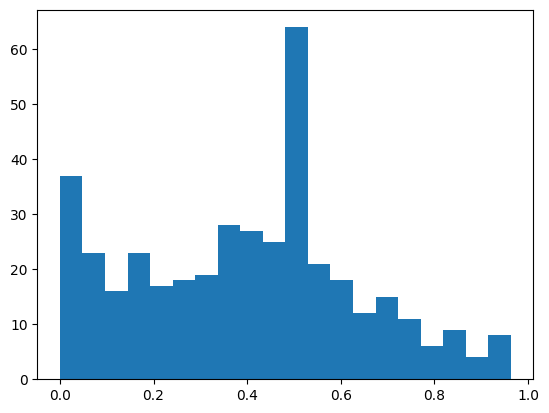

,filename,label
0,bydaidkpdp.mp4,0.359462
1,chviwxsfhg.mp4,0.369396
2,chtapglbcj.mp4,0.221717
3,akxoopqjqz.mp4,0.388530
4,atyntldecu.mp4,0.298636
...,...,...
396,bqdjzqhcft.mp4,0.002871
397,akvmwkdyuv.mp4,0.582463
398,ddqccgmtka.mp4,0.173325
399,ctpqeykqdp.mp4,0.454017


In [21]:
plt.hist(submission.label, 20)
plt.show()
submission

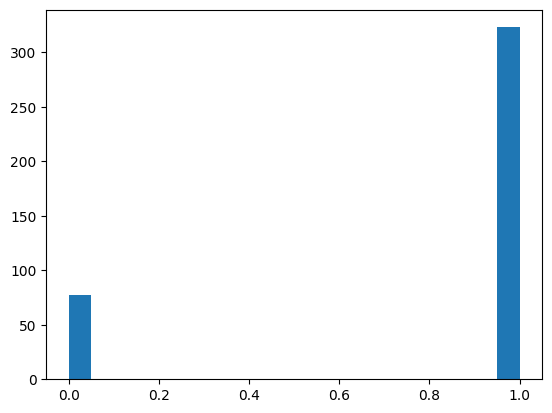

,label,split,original
aagfhgtpmv.mp4,1,train,vudstovrck.mp4
aapnvogymq.mp4,1,train,jdubbvfswz.mp4
abarnvbtwb.mp4,0,train,None
abofeumbvv.mp4,1,train,atvmxvwyns.mp4
abqwwspghj.mp4,1,train,qzimuostzz.mp4
...,...,...,...
etejaapnxh.mp4,1,train,wtreibcmgm.mp4
etmcruaihe.mp4,1,train,afoovlsmtx.mp4
etohcvnzbj.mp4,1,train,bdnaqemxmr.mp4
eudeqjhdfd.mp4,0,train,None


In [26]:
# train_sample_metadata.head()
train_sample_metadata['label'].replace(['REAL', 'FAKE'], [0, 1], inplace=True)
plt.hist(train_sample_metadata.label, 20)
plt.show()
train_sample_metadata

In [31]:
train_sample_metadata.index.rename('filename',inplace=True)

In [34]:
train_sample_metadata

,label,split,original
filename,,,
aagfhgtpmv.mp4,1,train,vudstovrck.mp4
aapnvogymq.mp4,1,train,jdubbvfswz.mp4
abarnvbtwb.mp4,0,train,None
abofeumbvv.mp4,1,train,atvmxvwyns.mp4
abqwwspghj.mp4,1,train,qzimuostzz.mp4
...,...,...,...
etejaapnxh.mp4,1,train,wtreibcmgm.mp4
etmcruaihe.mp4,1,train,afoovlsmtx.mp4
etohcvnzbj.mp4,1,train,bdnaqemxmr.mp4


In [36]:
submission = submission.set_index('filename')

In [37]:
submission.rename(columns={'label':'result'},inplace=True)
submission

,result
filename,
bydaidkpdp.mp4,0.359462
chviwxsfhg.mp4,0.369396
chtapglbcj.mp4,0.221717
akxoopqjqz.mp4,0.388530
atyntldecu.mp4,0.298636
...,...
bqdjzqhcft.mp4,0.002871
akvmwkdyuv.mp4,0.582463
ddqccgmtka.mp4,0.173325


In [40]:
result = pd.concat([submission, train_sample_metadata], axis=1, join="inner")

In [41]:
result.head()

,result,label,split,original
filename,,,,
bydaidkpdp.mp4,0.359462,1,train,gktjowiuqe.mp4
chviwxsfhg.mp4,0.369396,0,train,None
chtapglbcj.mp4,0.221717,0,train,None
akxoopqjqz.mp4,0.388530,1,train,meawmsgiti.mp4
atyntldecu.mp4,0.298636,1,train,mfzqxktxud.mp4


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='result', ylabel='label'>

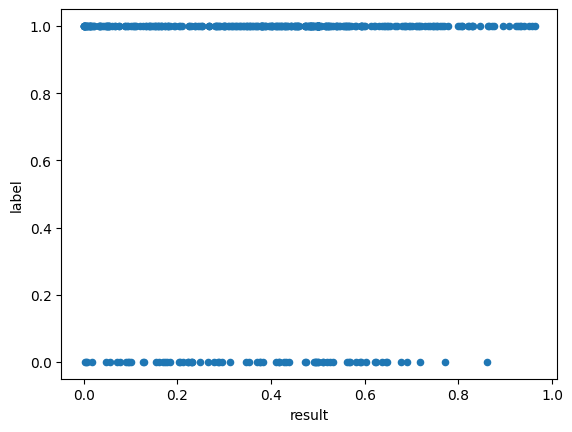

In [63]:
result.plot(x='result', y='label',kind='scatter')